# Normal equations

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from time import time

plt.rcParams["figure.figsize"] = [12, 8]

# Read data

In [2]:
# dataset part 1
dataset = pd.read_csv('../dataset/smog_part1.csv', index_col = 0)

# both datasets
#dataset = pd.concat([
#    pd.read_csv('../dataset/smog_part1.csv', index_col = 0),
#    pd.read_csv('../dataset/smog_part2_manual_fit.csv', index_col = 0)
#])

In [3]:
dataset = dataset[['pm25_x', 'pm25_y', 'temperatureSht', 'humiditySht', 'pressure']]
dataset = dataset[dataset['humiditySht'] >= 60]
dataset.head()

,pm25_x,pm25_y,temperatureSht,humiditySht,pressure
0,19.0,13.8,6.1,72,986
1,16.7,14.4,5.9,74,986
2,21.8,15.1,5.7,75,986
3,21.8,18.0,5.7,76,986
4,25.0,19.0,5.5,77,986


# Train and test split

Split data for train and test sets and add a column of ones

In [4]:
Y = dataset['pm25_x'].to_numpy().reshape(-1, 1)
#X = dataset.drop('pm25_x', axis = 1).to_numpy()
X = dataset['pm25_y'].to_numpy().reshape(-1, 1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)

In [6]:
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
x_test = np.c_[np.ones(x_test.shape[0]), x_test]

In [7]:
print(x_train[:5, :])

[[ 1.   6.6]
 [ 1.   2.2]
 [ 1.  22. ]
 [ 1.   5.7]
 [ 1.  10.5]]


# Equations

Solve the normal equations:<br>
$\theta = (X^TX)^{-1} X^Ty$.

In [8]:
theta = np.linalg.inv(np.dot(x_train.T, x_train)).dot(x_train.T).dot(y_train)
theta.ravel()

array([0.9374277 , 0.78694095])

# Result

In [9]:
theta[:, 0]

array([0.9374277 , 0.78694095])

In [10]:
y_pred = x_test.dot(theta)

In [13]:
r2 = r2_score(y_test, y_pred) * 100
print('R^2: ', round(r2, 2))
print("Mean squared error: ", mean_squared_error(y_pred, y_test))
print("Mean absolute error: ", mean_absolute_error(y_pred, y_test))

R^2:  80.03
Mean squared error:  10.460085912462114
Mean absolute error:  1.5721683045634922


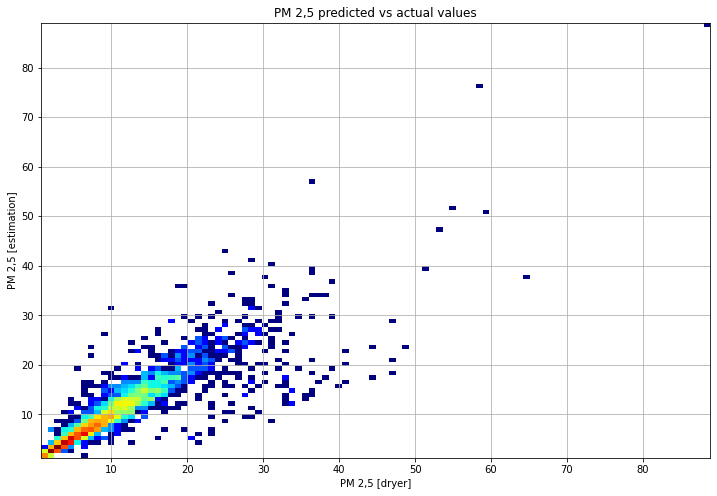

In [14]:
plt.hist2d(y_test[:, 0], y_pred[:, 0], bins= 100, cmap = 'jet', norm = matplotlib.colors.LogNorm())

plt.xlabel('PM 2,5 [dryer]')
plt.ylabel('PM 2,5 [estimation]')
plt.title('PM 2,5 predicted vs actual values')
plt.grid(True)

plt.show()

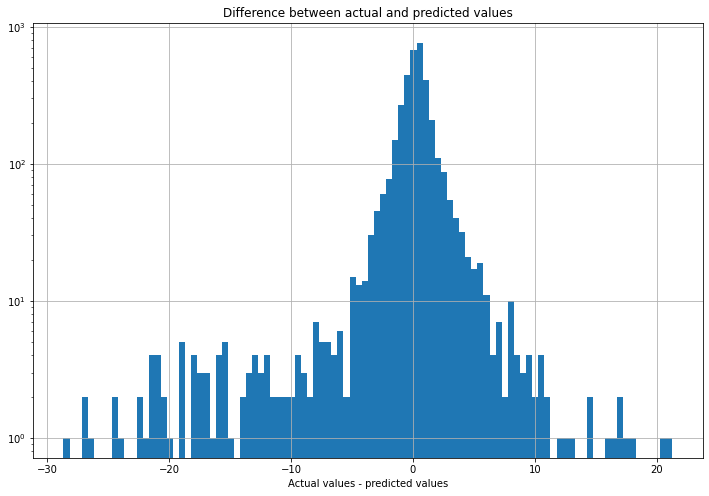

In [15]:
plt.hist(y_pred - y_test, density = False, bins = 100)

plt.yscale('log')
plt.xlabel('Actual values - predicted values')
plt.title('Difference between actual and predicted values')
plt.grid(True)
plt.show()